In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
cols=['OnlineBackup','StreamingTV','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity']
for i in cols:
    df[i]=df[i].replace({'No internet service':'No'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [6]:
df.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.Churn=df.Churn.apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No,No,No,No,Two year,No,Credit card (automatic),24.10,1734.65,0
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,0
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,0


In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('customerID',axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),24.10,1734.65,0
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,0
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,1
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0
5983,Male,0,Yes,Yes,12,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,21.15,306.05,0
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,1


In [10]:
new_df=pd.get_dummies(df,drop_first=True)
new_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1734.65,0,1,1,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,44,88.15,3973.20,0,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
2,1,38,74.95,2869.85,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,4,55.90,238.50,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,0,2,53.45,119.50,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,95.00,95.00,1,1,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0
5982,0,23,91.10,2198.30,0,0,1,1,1,0,...,1,1,1,1,0,1,1,1,0,0
5983,0,12,21.15,306.05,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
5984,1,12,99.45,1200.15,1,1,0,0,1,0,...,1,0,1,1,0,0,1,0,1,0


In [11]:
new_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,...,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.161647,32.523092,64.846687,2298.060617,0.265562,0.509371,0.484605,0.298025,0.901606,0.098394,...,0.343373,0.289826,0.385375,0.391232,0.213353,0.239625,0.589859,0.217871,0.335676,0.227912
std,0.368157,24.500858,30.107576,2274.127165,0.441669,0.499954,0.499805,0.457429,0.297871,0.297871,...,0.474875,0.453719,0.486724,0.488067,0.409709,0.426890,0.491900,0.412834,0.472266,0.419520
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.750000,404.312500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.425000,1412.150000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,89.900000,3846.962500,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
new_df.tenure=new_df.tenure/100
new_df.MonthlyCharges=new_df.MonthlyCharges/150
new_df.TotalCharges=new_df.TotalCharges/9500

In [13]:
new_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,...,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.161647,0.325231,0.432311,0.241901,0.265562,0.509371,0.484605,0.298025,0.901606,0.098394,...,0.343373,0.289826,0.385375,0.391232,0.213353,0.239625,0.589859,0.217871,0.335676,0.227912
std,0.368157,0.245009,0.200717,0.239382,0.441669,0.499954,0.499805,0.457429,0.297871,0.297871,...,0.474875,0.453719,0.486724,0.488067,0.409709,0.426890,0.491900,0.412834,0.472266,0.419520
min,0.000000,0.010000,0.121667,0.001979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.090000,0.238333,0.042559,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.290000,0.469500,0.148647,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.560000,0.599333,0.404943,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,0.720000,0.791667,0.914189,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
y = new_df['Churn']
X = new_df.drop('Churn',axis=1)

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# LOGISTIC REGRESSION

In [196]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [197]:
model.fit(X_train,y_train)

LogisticRegression()

In [198]:
model.score(X_test,y_test)*100 , model.score(X_train,y_train)*100

(78.1772575250836, 80.58577405857741)

In [199]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       877
           1       0.62      0.49      0.54       319

    accuracy                           0.78      1196
   macro avg       0.72      0.69      0.70      1196
weighted avg       0.77      0.78      0.77      1196



In [200]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[780,  97],
       [164, 155]])

# DECISION TREE

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [188]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [189]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [190]:
tree.score(X_test,y_test)*100 , tree.score(X_train,y_train)*100

(73.24414715719062, 99.89539748953975)

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       877
           1       0.50      0.43      0.46       319

    accuracy                           0.73      1196
   macro avg       0.65      0.64      0.64      1196
weighted avg       0.72      0.73      0.73      1196



# RANDOM FOREST

In [192]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=35,oob_score=True,n_jobs=-1,max_features='auto')

In [193]:
forest.fit(X_test,y_test)

RandomForestClassifier(n_estimators=35, n_jobs=-1, oob_score=True)

In [194]:
forest.score(X_test,y_test)*100 , forest.score(X_train,y_train)*100

(99.83277591973244, 78.03347280334728)

In [195]:
from sklearn.metrics import classification_report
print(classification_report(y_test,forest.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       877
           1       1.00      1.00      1.00       319

    accuracy                           1.00      1196
   macro avg       1.00      1.00      1.00      1196
weighted avg       1.00      1.00      1.00      1196



# ARTIFICIAL NEURAL NETWORK

In [74]:
import tensorflow as tf
from tensorflow import keras

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [122]:
X_train.shape , X_test.shape

((4780, 24), (1196, 24))

In [147]:
ANN=keras.Sequential([
    keras.layers.Dense(600,input_shape=(24,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ANN.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy']
             )
ANN.fit(X_train,y_train,epochs=50)

Epoch 1/50
150/150 [==============================] - 2s 7ms/step - loss: 0.4401 - accuracy: 0.7902
Epoch 2/50
150/150 [==============================] - 1s 6ms/step - loss: 0.4173 - accuracy: 0.8040
Epoch 3/50
150/150 [==============================] - 1s 6ms/step - loss: 0.4098 - accuracy: 0.8073
Epoch 4/50
150/150 [==============================] - 1s 6ms/step - loss: 0.4030 - accuracy: 0.8088
Epoch 5/50
150/150 [==============================] - 1s 6ms/step - loss: 0.3982 - accuracy: 0.8123
Epoch 6/50
150/150 [==============================] - 1s 8ms/step - loss: 0.3929 - accuracy: 0.8163
Epoch 7/50
150/150 [==============================] - 1s 7ms/step - loss: 0.3873 - accuracy: 0.8230
Epoch 8/50
150/150 [==============================] - 1s 7ms/step - loss: 0.3812 - accuracy: 0.8199
Epoch 9/50
150/150 [==============================] - 1s 7ms/step - loss: 0.3740 - accuracy: 0.8232
Epoch 10/50
150/150 [==============================] - 1s 7ms/step - loss: 0.3682 - accuracy: 0.8255

In [148]:
ANN.evaluate(X_test,y_test)

38/38 [==============================] - 0s 3ms/step - loss: 1.2951 - accuracy: 0.7425


[1.2950633764266968, 0.7424749135971069]

In [154]:
yp = ANN.predict(X_test)
yp[:5]

array([[4.6366877e-06],
       [6.7403334e-08],
       [3.5625064e-18],
       [2.1441799e-06],
       [2.1715026e-11]], dtype=float32)

In [155]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [156]:
y_pred[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [157]:
y_test[:10]

3109    0
3092    0
297     0
1428    0
1611    0
2934    0
3802    0
4662    0
4336    0
3055    0
Name: Churn, dtype: int64

In [158]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       877
           1       0.52      0.50      0.51       319

    accuracy                           0.74      1196
   macro avg       0.67      0.67      0.67      1196
weighted avg       0.74      0.74      0.74      1196



Text(69.0, 0.5, 'Truth')

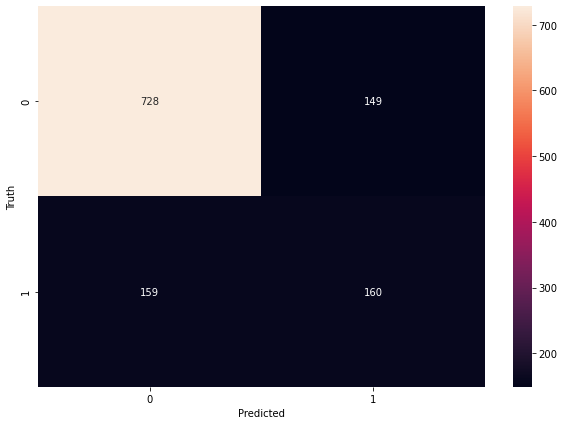

In [159]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

0.7424749163879598

# DROPOUT REGULARIZATION

In [172]:
Drop_ANN=keras.Sequential([
    keras.layers.Dense(600,input_shape=(24,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

Drop_ANN.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy']
             )
Drop_ANN.fit(X_train,y_train,epochs=50)

Epoch 1/50
150/150 [==============================] - 2s 7ms/step - loss: 0.4614 - accuracy: 0.7707
Epoch 2/50
150/150 [==============================] - 1s 7ms/step - loss: 0.4297 - accuracy: 0.7927
Epoch 3/50
150/150 [==============================] - 1s 8ms/step - loss: 0.4277 - accuracy: 0.7981
Epoch 4/50
150/150 [==============================] - 1s 8ms/step - loss: 0.4178 - accuracy: 0.8044
Epoch 5/50
150/150 [==============================] - 1s 7ms/step - loss: 0.4168 - accuracy: 0.8021
Epoch 6/50
150/150 [==============================] - 1s 7ms/step - loss: 0.4171 - accuracy: 0.8013
Epoch 7/50
150/150 [==============================] - 1s 7ms/step - loss: 0.4113 - accuracy: 0.8086
Epoch 8/50
150/150 [==============================] - 1s 7ms/step - loss: 0.4142 - accuracy: 0.8021
Epoch 9/50
150/150 [==============================] - 1s 7ms/step - loss: 0.4093 - accuracy: 0.8069
Epoch 10/50
150/150 [==============================] - 1s 7ms/step - loss: 0.4058 - accuracy: 0.8092

In [173]:
Drop_ANN.evaluate(X_test,y_test)

38/38 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7659


[0.5268712639808655, 0.7658863067626953]

In [174]:
y = Drop_ANN.predict(X_test)
y[:5]

array([[0.00188071],
       [0.01526159],
       [0.00067514],
       [0.02917358],
       [0.0027118 ]], dtype=float32)

In [175]:
y_pre=[]
for element in y:
    if element > 0.5:
        y_pre.append(1)
    else:
        y_pre.append(0)

In [176]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       877
           1       0.58      0.43      0.49       319

    accuracy                           0.77      1196
   macro avg       0.70      0.66      0.67      1196
weighted avg       0.75      0.77      0.75      1196



Text(69.0, 0.5, 'Truth')

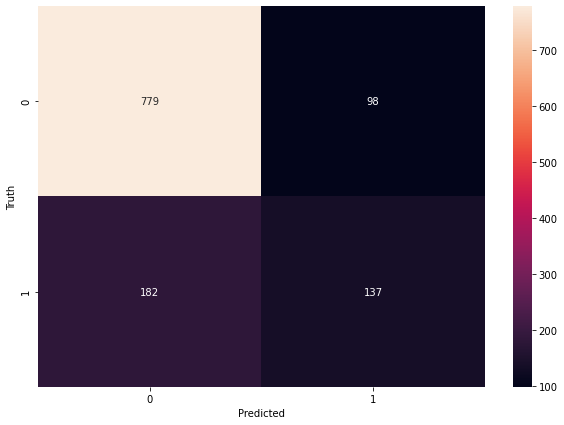

In [177]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pre)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')